In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# load data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/College/Research Haikal/dataset1.xlsx', index_col=0)

In [ ]:
# create a dictionary to translate column names
translation_dict = {'Wavelenth': 'Wavelength', 
                    'indeks bias': 'Refractive index',
                    'diameter hole': 'Hole diameter', 
                    'ketebalan emas': 'Gold thickness',
                    'ketebalan TiO2': 'TiO2 thickness', 
                    'confinement Loss': 'Confinement loss'}

# rename the columns using the translation dictionary
df = df.rename(columns=translation_dict)

In [ ]:
df['TiO2 thickness']

0      45
1      45
2      45
3      45
4      45
       ..
739    35
740    35
741    35
742    35
743    35
Name: TiO2 thickness, Length: 744, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Load the data
data = df

# Preprocess the data
X = data.iloc[:, :-1].values #data input
y = data.iloc[:, -1].values #data output

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train

array([[ 0.62,  1.36,  1.5 , 35.  , 35.  ],
       [ 0.59,  1.35,  1.5 , 50.  , 45.  ],
       [ 0.73,  1.36,  1.5 , 35.  , 35.  ],
       ...,
       [ 0.64,  1.36,  1.51, 45.  , 35.  ],
       [ 0.56,  1.36,  1.5 , 45.  , 35.  ],
       [ 0.57,  1.36,  1.48, 45.  , 35.  ]])

In [ ]:
X_train[:,3]

In [ ]:
# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'scaled: {X_train_scaled}')
print(f'X_train:{X_train}')

for i, j in zip(X_train_scaled,X_train):
  for k,l in zip(i,j):
    print(k,l)

In [ ]:
X_train_scaled[:][3]

array([-0.22486172,  0.10378951, -1.58402709, -0.22894514, -0.97977962])

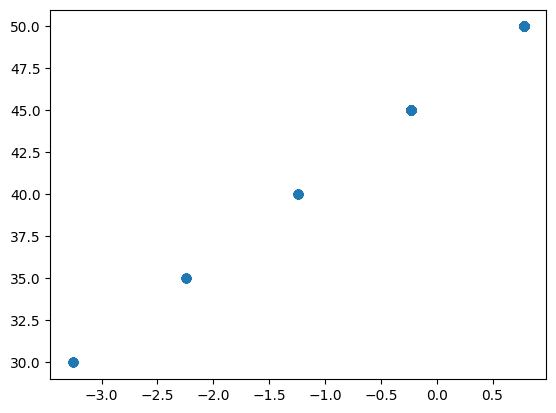

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.hist(X_train_scaled[:,3],X_train[:,3])

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

(array([ 25.,   0.,  21.,   0.,   0.,  27.,   0., 243.,   0., 279.]),
 array([-3.25610862, -2.85248682, -2.44886502, -2.04524322, -1.64162143,
        -1.23799963, -0.83437783, -0.43075604, -0.02713424,  0.37648756,
         0.78010936]),
 <BarContainer object of 10 artists>)

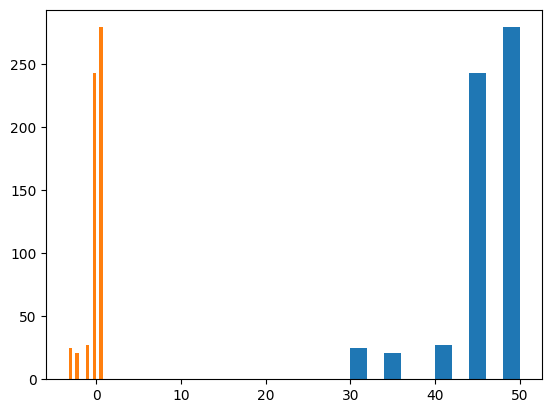

In [ ]:
plt.hist(X_train[:,3])
plt.hist(X_train_scaled[:,3])

In [ ]:
#kombinasi epoch dan nodes 10 50 100 150 200 250 

import pandas as pd
import numpy as np
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Load the data
data = df

# Preprocess the data
X = data.iloc[:, :-1].values #data input
y = data.iloc[:, -1].values #data output

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#define number of nodes 
num_nodes_list = [10, 50, 100, 150, 200, 250]

best_input_node = 0
best_mse = float('inf')

for num_nodes in num_nodes_list :
    
    # Create the deep learning model
    model = Sequential()
    model.add(Dense(units= num_nodes, input_dim=5, activation='relu')) #input layer, how 
    model.add(Dense(units= 10, activation='relu'))   #hidden layer 1
    model.add(Dense(units=1, activation='relu'))   #output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train_scaled, y_train, batch_size=10, epochs=10, verbose = 0)

    # Evaluate the model
    score = model.evaluate(X_test_scaled, y_test)
    print('Test loss for {} nodes: {}'.format(num_nodes, score))

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error for {} nodes: {:.4f}".format(num_nodes, mse))
    
    if mse < best_mse :
        best_mse = mse
        best_input_node = num_nodes

    # mengekstrak eppoct dan mse dari history
    epoch = np.arange(1, len(history.history['loss']) + 1) 
    mse = history.history['loss'] #Create a pandas dataframe to store the epoch and MSE 

    df_history = pd.DataFrame({'Epoch': epoch, 'MSE': mse})

    #saving
    filename = 'training_history_{}nodes.csv'.format(num_nodes)
    df_history.to_csv(filename, index = False)
    
print(f'Best best_input_node : {best_input_node}, mse : {best_mse}')

In [ ]:
#kombinasi epoch dan nodes 10 50 100 150 200 250 

import pandas as pd
import numpy as np
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Load the data
data = df

# Preprocess the data
X = data.iloc[:, :-1].values #data input
y = data.iloc[:, -1].values #data output

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#define number of nodes 
num_nodes_list = [10, 50, 100, 150, 200, 250]

best_node = 0
best_mse = float('inf')

for num_nodes in num_nodes_list :
    
    # Create the deep learning model
    model = Sequential()
    model.add(Dense(units= best_input_node, input_dim=5, activation='relu')) #input layer
    model.add(Dense(units=num_nodes, activation='relu'))   #hidden layer 1
    model.add(Dense(units=1, activation='relu'))   #output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train_scaled, y_train, batch_size=10, epochs=10, verbose = 0)

    # Evaluate the model
    score = model.evaluate(X_test_scaled, y_test)
    print('Test loss for {} nodes: {}'.format(num_nodes, score))

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error for {} nodes: {:.4f}".format(num_nodes, mse))
    
    if mse < best_mse :
        best_mse = mse
        best_node = num_nodes

    # mengekstrak eppoct dan mse dari history
    epoch = np.arange(1, len(history.history['loss']) + 1) 
    mse = history.history['loss'] #Create a pandas dataframe to store the epoch and MSE 

    df_history = pd.DataFrame({'Epoch': epoch, 'MSE': mse})

    #saving
    filename = 'training_history_{}nodes.csv'.format(num_nodes)
    df_history.to_csv(filename, index = False)
    
print(f'Best best_node: {best_node}, mse : {best_mse}')

5/5 [==============================] - 0s 5ms/step - loss: 0.0215
Test loss for 10 nodes: 0.02151898480951786
5/5 [==============================] - 0s 4ms/step
Mean Squared Error for 10 nodes: 0.0215
5/5 [==============================] - 0s 3ms/step - loss: 0.0202
Test loss for 50 nodes: 0.02015514299273491
5/5 [==============================] - 0s 3ms/step
Mean Squared Error for 50 nodes: 0.0202
5/5 [==============================] - 0s 3ms/step - loss: 0.0162
Test loss for 100 nodes: 0.01618487574160099
5/5 [==============================] - 0s 2ms/step
Mean Squared Error for 100 nodes: 0.0162
5/5 [==============================] - 0s 3ms/step - loss: 0.0228
Test loss for 150 nodes: 0.022825954481959343
5/5 [==============================] - 0s 3ms/step
Mean Squared Error for 150 nodes: 0.0228
5/5 [==============================] - 0s 3ms/step - loss: 0.0281
Test loss for 200 nodes: 0.02812470681965351
5/5 [==============================] - 0s 3ms/step
Mean Squared Error for 200 no

In [ ]:
#number of hidden layer dari 1 hingga 5 ( 1, 2, 3, 4, 5)
import pandas as pd
import numpy as np
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Load the data
data = df

# Preprocess the data
X = data.iloc[:, :-1].values #data input
y = data.iloc[:, -1].values #data output

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#define number of nodes 
num_layers_list = [1, 2, 3, 4, 5]

best_mse = float('inf')
best_hidden_layer = 0

for num_layers in num_layers_list :
    
    # Create the deep learning model
    model = Sequential()
    model.add(Dense(units= best_input_node , input_dim=5, activation='relu')) #input layer
    for i in range (num_layers):
        model.add(Dense(units=best_node, activation='relu'))   #hidden layer 1
    model.add(Dense(units=1, activation='relu'))   #output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train_scaled, y_train, batch_size=10, epochs=10, verbose = 0)

    # Evaluate the model
    score = model.evaluate(X_test_scaled, y_test)
    print('Test loss for {} layers: {}'.format(num_layers, score))

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error for {} layers: {:.4f}".format(num_layers, mse))
    
    # Check if the current epoch gives a lower loss
    if mse < best_mse:
        best_mse = mse
        best_hidden_layer = num_layers

    # mengekstrak eppoct dan mse dari history
    epoch = np.arange(1, len(history.history['loss']) + 1) 
    mse = history.history['loss'] #Create a pandas dataframe to store the epoch and MSE 

    # print(f"this is me just checking mse: {mse}")
    df_history = pd.DataFrame({'Epoch': epoch, 'MSE': mse})
    
    #saving
    filename = 'training_history_{}layers.csv'.format(num_layers)

    df_history.to_csv(filename, index = False)
    
print(f'Best hidden_layer: {best_hidden_layer}, mse : {best_mse}')

5/5 [==============================] - 0s 3ms/step - loss: 0.0189
Test loss for 1 layers: 0.01885550282895565
5/5 [==============================] - 0s 3ms/step
Mean Squared Error for 1 layers: 0.0189
5/5 [==============================] - 0s 3ms/step - loss: 0.0330
Test loss for 2 layers: 0.03299711272120476
5/5 [==============================] - 0s 2ms/step
Mean Squared Error for 2 layers: 0.0330
5/5 [==============================] - 0s 3ms/step - loss: 0.0212
Test loss for 3 layers: 0.021240640431642532
5/5 [==============================] - 0s 3ms/step
Mean Squared Error for 3 layers: 0.0212
5/5 [==============================] - 0s 5ms/step - loss: 0.0215
Test loss for 4 layers: 0.021495042368769646
5/5 [==============================] - 0s 3ms/step
Mean Squared Error for 4 layers: 0.0215
5/5 [==============================] - 0s 3ms/step - loss: 0.0120
Test loss for 5 layers: 0.011994820088148117
5/5 [==============================] - 0s 3ms/step
Mean Squared Error for 5 layers:

In [ ]:
#memainkan jumlah epoch 1000 2000 3000 4000 5000
import pandas as pd
import numpy as np
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Load the data
data = df

# Preprocess the data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the deep learning model
#model = Sequential()
#model.add(Dense(units=6, input_dim=5, activation='relu'))
#model.add(Dense(units=6, activation='relu'))
#model.add(Dense(units=1, activation='linear'))

# Create the deep learning model
model = Sequential()
model.add(Dense(units= best_input_node , input_dim=5, activation='relu')) #input layer
for i in range (best_hidden_layer):
    model.add(Dense(units=best_node, activation='relu'))   #hidden layer 1
model.add(Dense(units=1, activation='relu'))   #output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define epochs to train
epochs = [1000, 2000, 3000, 4000, 5000]

# Train the model for each epoch and evaluate
best_mse = float('inf')
best_epoch = 0
for epoch in epochs:
    print(f'Training for {epoch} epochs')
    history = model.fit(X_train_scaled, y_train, batch_size = 10, epochs=epoch, verbose = 0)
    score = model.evaluate(X_test_scaled, y_test, verbose=0)
    print('Test loss:', score)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error for {} epoch: {:.4f}".format(epoch, mse))
    
    # Check if the current epoch gives a lower loss
    if mse < best_mse:
        best_mse = mse
        best_epoch = epoch

    # mengekstrak eppoct dan mse dari history
    epoch_i = np.arange(1, len(history.history['loss']) + 1) 
    mse = history.history['loss'] #Create a pandas dataframe to store the epoch and MSE 
    
    df_history = pd.DataFrame({'Epoch': epoch_i, 'MSE': mse})
    
    #saving
    filename = 'training_history_{}epoch.csv'.format(epoch)
    df_history.to_csv(filename, index = False)
    
print(f'Best epoch: {best_epoch}, mse: {best_mse}')

Training for 1000 epochs
Test loss: 0.002525267656892538
5/5 [==============================] - 0s 3ms/step
Mean Squared Error for 1000 epoch: 0.0025
Training for 2000 epochs
Test loss: 0.0024182714987546206
5/5 [==============================] - 0s 3ms/step
Mean Squared Error for 2000 epoch: 0.0024
Training for 3000 epochs
Test loss: 0.0023997873067855835
5/5 [==============================] - 0s 4ms/step
Mean Squared Error for 3000 epoch: 0.0024
Training for 4000 epochs
Test loss: 0.002290532924234867
5/5 [==============================] - 0s 3ms/step
Mean Squared Error for 4000 epoch: 0.0023
Training for 5000 epochs
Test loss: 0.0022382375318557024
5/5 [==============================] - 0s 2ms/step
Mean Squared Error for 5000 epoch: 0.0022
Best epoch: 5000, mse: 0.002238238292304945
